In [44]:
#^^^^^^^^^^^^^^^^^^^^^^^^^^
# Name: Jonah Zembower
# Date: February 5, 2025
# Project: Harvard Research Study on Postural Stability During Heart Catheterization Surgeries
#^^^^^^^^^^^^^^^^^^^^^^^^^^

# Import Libraries and Data:

#### Importing Libraries:

In [45]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

#### Importing Data:

In [46]:
# Loading in the data
sum_duration = pd.read_csv('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Harvard Study\\CSVs\\Full Sum of Duration Merged\\combined_sum_duration.csv')

#### Indexes:

In [ ]:
# Set the index for the lead subjects
subject_ids_lead = [
 '1_001', '2_001', '4_001', '2_002', '3_002', 
    '1_003', '2_003', '4_003',             
    '1_004', '3_005', '5_005', '1_006',
    '2_006', '1_007', '2_007', '2_008', '3_008',
    '2_019', '3_019', '1_020','2_020', '1_021','2_021',
    '1_022', '4_022', '1_023',
    '2_023', '1_024','2_024', '1_026', '2_026','1_027','2_027',
    '1_028', '2_028', '1_029', '2_029',
    '2_030', '3_030', '2_031'
]
# Set the index for the rampart subjects
subject_ids_rampart = [
    '6_001', '1_002',
    '4_002', '3_004', '4_004', '1_005', '4_005',
    '3_006', '4_006', '3_007', '4_007', '1_008',
    '4_008', '1_019', '4_019', '2_022', '3_022', '4_023',
    '1_030', '1_031'
]

# Columns for Cervical/Thoracic
cervical_thoracic_columns = ['Cervical Flexion Fwd [deg]', 'Cervical Flexion Lat RT [deg]', 'Cervical Axial RT [deg]'
       ,'Thoracic Flexion Fwd [deg]', 'Thoracic Flexion Lat RT [deg]', 'Thoracic Axial RT [deg]']
# Columns for Lumbar/Pelvic
lumbar_pelvic_columns = ['Torso-Pelvic Flexion Fwd [deg]',
       'Torso-Pelvic Flexion Lat RT [deg]',
       'Torso-Pelvic Axial RT [deg]','Lumbar Flexion Fwd [deg]',
       'Lumbar Flexion Lat RT [deg]',
       'Lumbar Axial RT [deg]']

# Index for each CSV file:
index = [
    '1_001','2_001','4_001','6_001', '1_002', '2_002', '3_002', '4_002',
    '1_003','2_003','4_003','1_004','3_004','4_004',
    '1_005','3_005','4_005','5_005','1_006', 
    '2_006', '3_006', '4_006', '1_007', '2_007',
      '3_007', '4_007', '1_008', '2_008', '3_008', '4_008',
      '1_019', '2_019', '3_019', '4_019','1_020','2_020',
       '1_021','2_021','1_022','2_022','3_022','4_022',
        '1_023','2_023','4_023','1_024','2_024','1_026','2_026',
         '1_027','2_027','1_028','2_028','1_029','2_029',
         '1_030','2_030','3_030',  '1_031', '2_031'
]


# Load both columns together
case_survey_columns = ['Participant ID', 'Age', 'Race ', 'Ethnicity ', 'Gender',
       'Role in cath lab',
       'How many years has the participant worked in the cardiac catheterization laboratory?',
       'Participant Height (in)', 'Participant Weight (lbs)', 'Do you exercise...',
       'Cardio', 'Upper Body Strength Training',
       'Lower body strength training', 'Abdominal strength training', 'Yoga',
       'Stretching', 'Pilates', 'Other Exercise',
       'Do you have a history of orthopedic injury?', 'Neck Injury',
       'Back Injury', 'Shoulder Injury', 'Leg Injury', 'Arm Injury',
       'Other Injury', 'Have you ever had surgery for orthopedic injury?',
       'Do you have any chronic pain syndromes?', 'Neck Pain', 'Back Pain',
       'Shoulder Pain', 'Arm Pain', 'Leg Pain', 'Other Pain',
       'Date of Case', 'Case Number for the day',
       'Case being done...', 'Participant wearing...',
       'Is participant a technologist?', 'Is the tech...',
       'How many hours of sleep did participant have the night before',
       'Right Radial', 'Left Radial', 'Right Femoral', 'Left Femoral',
       'Right Jugular', 'Left Jugular', 'Right Brachial Vein',
       'Left Brachial Vein', 'Type of Case',
       'Total case length in minutes (first lidocaine injection - sheath removal)',
       'Total radiation (mGy) from procedure log',
       'Participant radiation (mrem)', 'Control Radiation (mrem)',
       'Total contrast (mL)'
]

# Analysis Focus:

1. Hypothesis Testing between groups related to the kinematics and joint angles values. 
2. Showcase the graphs along with the corresponding values.
3. Look at the different statistics and differences for these corresponding survey characteristics.

# Begin Analysis:

We want to stratify the statistical significant differences by attending vs. nonattending, lead vs. rampart, case length differences, and gender differences.

### Stratify by Gender:

In [48]:
# Stratify by gender
sum_female = sum_duration[sum_duration['Gender'] == 'female']
sum_male = sum_duration[sum_duration['Gender'] == 'male']


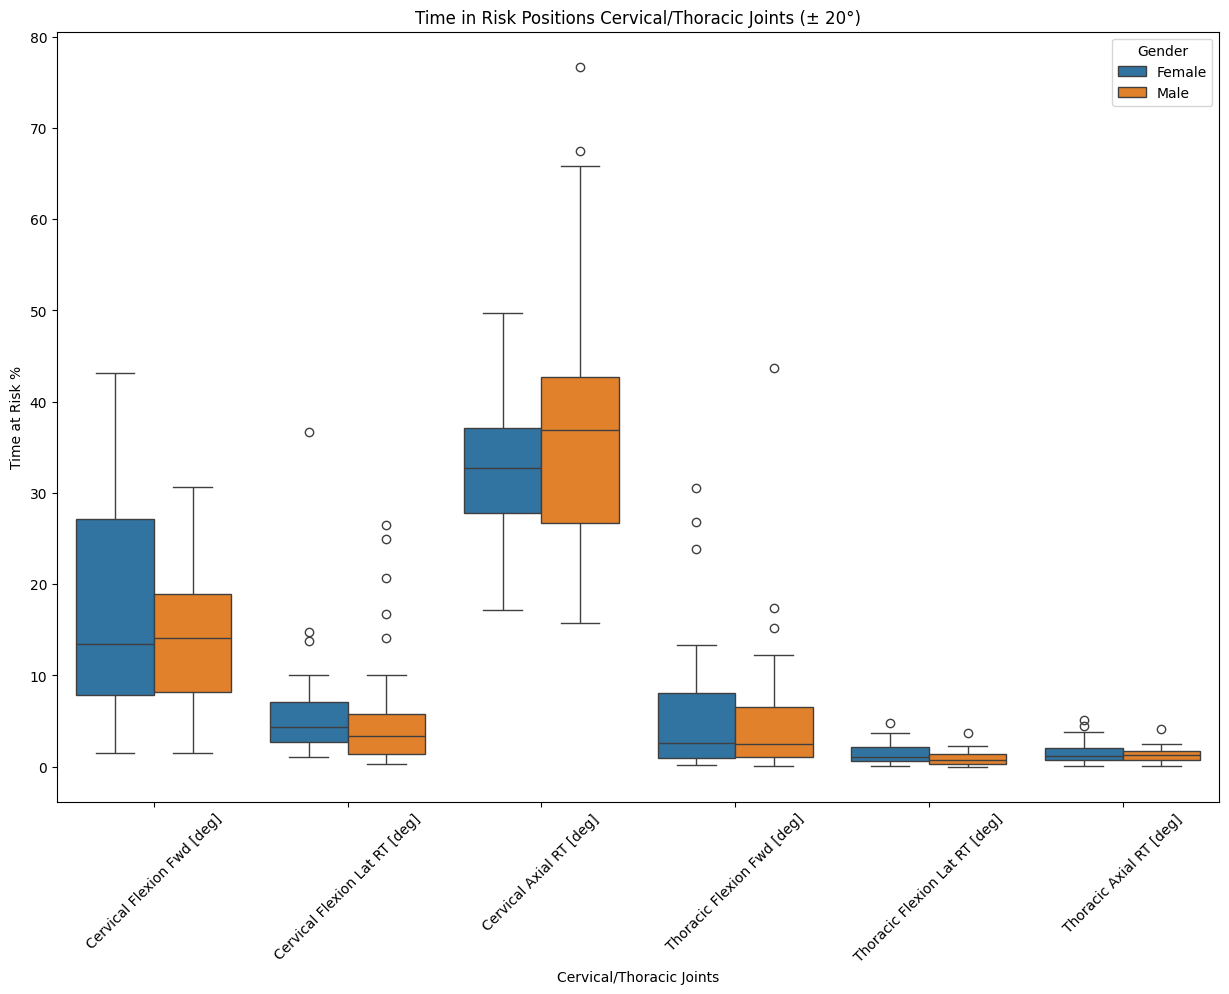

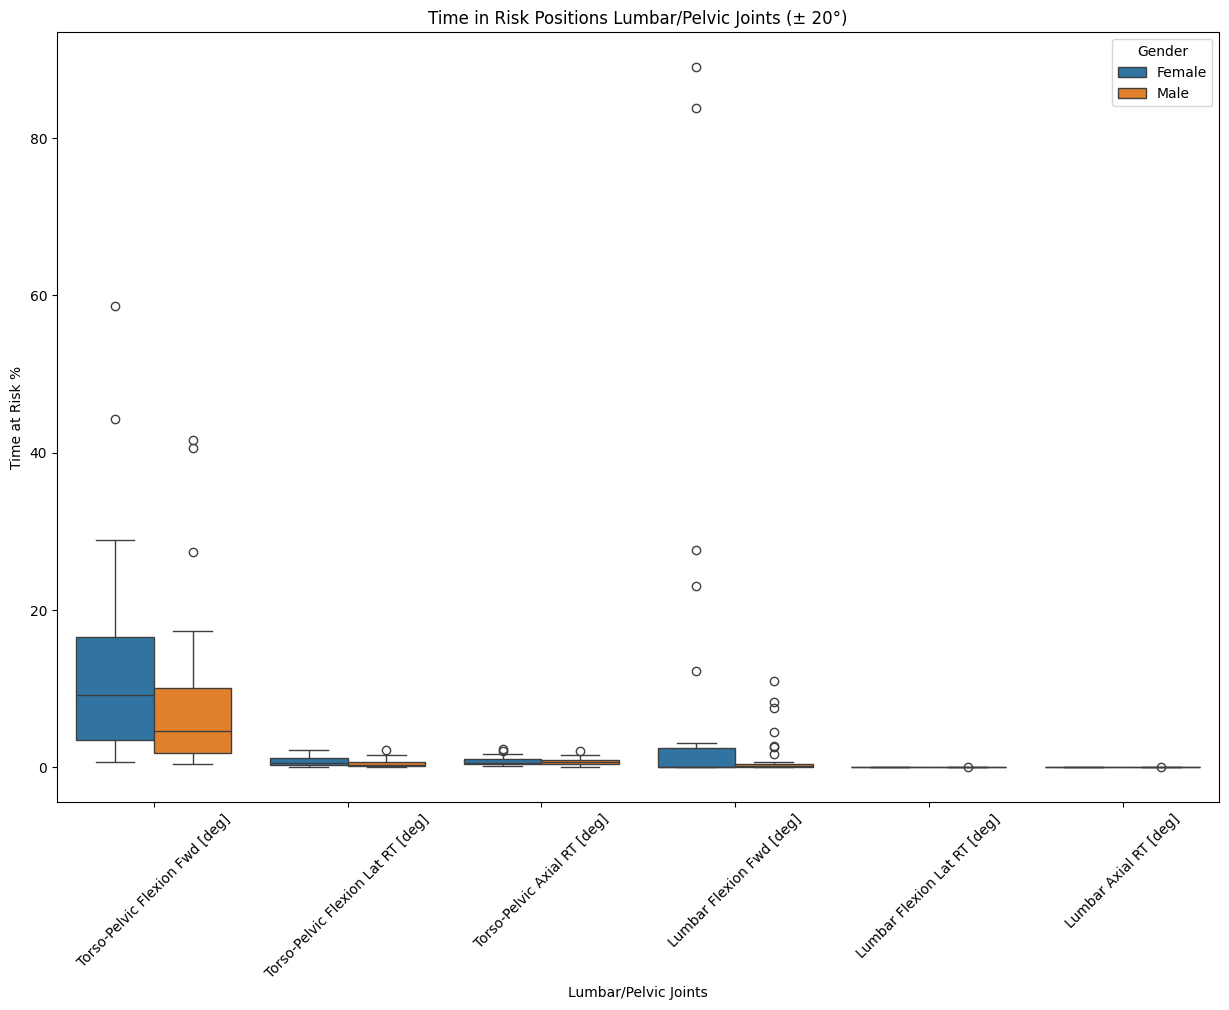

In [52]:
# Combine male and female data
sum_duration['Gender'] = sum_duration['Gender'].str.capitalize()  # Ensure consistent capitalization

# Melt the dataframe for Cervical/Thoracic muscle groups
melted_cervical_thoracic = sum_duration.melt(id_vars=['Gender'], value_vars=cervical_thoracic_columns, var_name='variable', value_name='value')

# Box plot for Cervical/Thoracic muscle groups
plt.figure(figsize=(15, 10))
sns.boxplot(data=melted_cervical_thoracic, x='variable', y='value', hue='Gender', 
            order=cervical_thoracic_columns)
plt.title('Time in Risk Positions Cervical/Thoracic Joints (± 20°)')
plt.xticks(rotation=45)
plt.ylabel('Time at Risk %')
plt.xlabel('Cervical/Thoracic Joints')
plt.show()

# Melt the dataframe for Lumbar/Pelvic muscle groups
melted_lumbar_pelvic = sum_duration.melt(id_vars=['Gender'], value_vars=lumbar_pelvic_columns, var_name='variable', value_name='value')

# Box plot for Lumbar/Pelvic muscle groups
plt.figure(figsize=(15, 10))
sns.boxplot(data=melted_lumbar_pelvic, x='variable', y='value', hue='Gender', 
            order=lumbar_pelvic_columns)
plt.title('Time in Risk Positions Lumbar/Pelvic Joints (± 20°)')
plt.xlabel('Lumbar/Pelvic Joints')
plt.ylabel('Time at Risk %')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Perform t-test for Cervical/Thoracic muscle groups
for column in cervical_thoracic_columns:
    t_stat, p_value = ttest_ind(sum_male[column], sum_female[column], nan_policy='omit')
    print(f'T-test for {column}: t-statistic = {t_stat}, p-value = {p_value}')

# Perform t-test for Lumbar/Pelvic muscle groups
for column in lumbar_pelvic_columns:
    t_stat, p_value = ttest_ind(sum_male[column], sum_female[column], nan_policy='omit')
    print(f'T-test for {column}: t-statistic = {t_stat}, p-value = {p_value}')

T-test for Cervical Flexion Fwd [deg]: t-statistic = -1.3541781785967257, p-value = 0.1808436323296589
T-test for Cervical Flexion Lat RT [deg]: t-statistic = -0.4455276565991604, p-value = 0.6575690203813147
T-test for Cervical Axial RT [deg]: t-statistic = 1.3288030637354027, p-value = 0.18902935165435406
T-test for Thoracic Flexion Fwd [deg]: t-statistic = -0.63201413867379, p-value = 0.5298191482360377
T-test for Thoracic Flexion Lat RT [deg]: t-statistic = -2.2514811780741653, p-value = 0.028092720997251883
T-test for Thoracic Axial RT [deg]: t-statistic = -1.2566055300292747, p-value = 0.21384901524661917
T-test for Torso-Pelvic Flexion Fwd [deg]: t-statistic = -1.70554494500542, p-value = 0.09335289561612027
T-test for Torso-Pelvic Flexion Lat RT [deg]: t-statistic = -2.085215855638667, p-value = 0.04138518178204393
T-test for Torso-Pelvic Axial RT [deg]: t-statistic = -0.8479248523854914, p-value = 0.3999066835526661
T-test for Lumbar Flexion Fwd [deg]: t-statistic = -2.0364608

### Stratify by Attending vs. Nonattending:

In [ ]:
# Stratify by role in cath lab
sum_attending = sum_duration[sum_duration['Role in cath lab'] == 'Attending']
sum_nonattending = sum_duration[sum_duration['Role in cath lab'] != 'Attending']

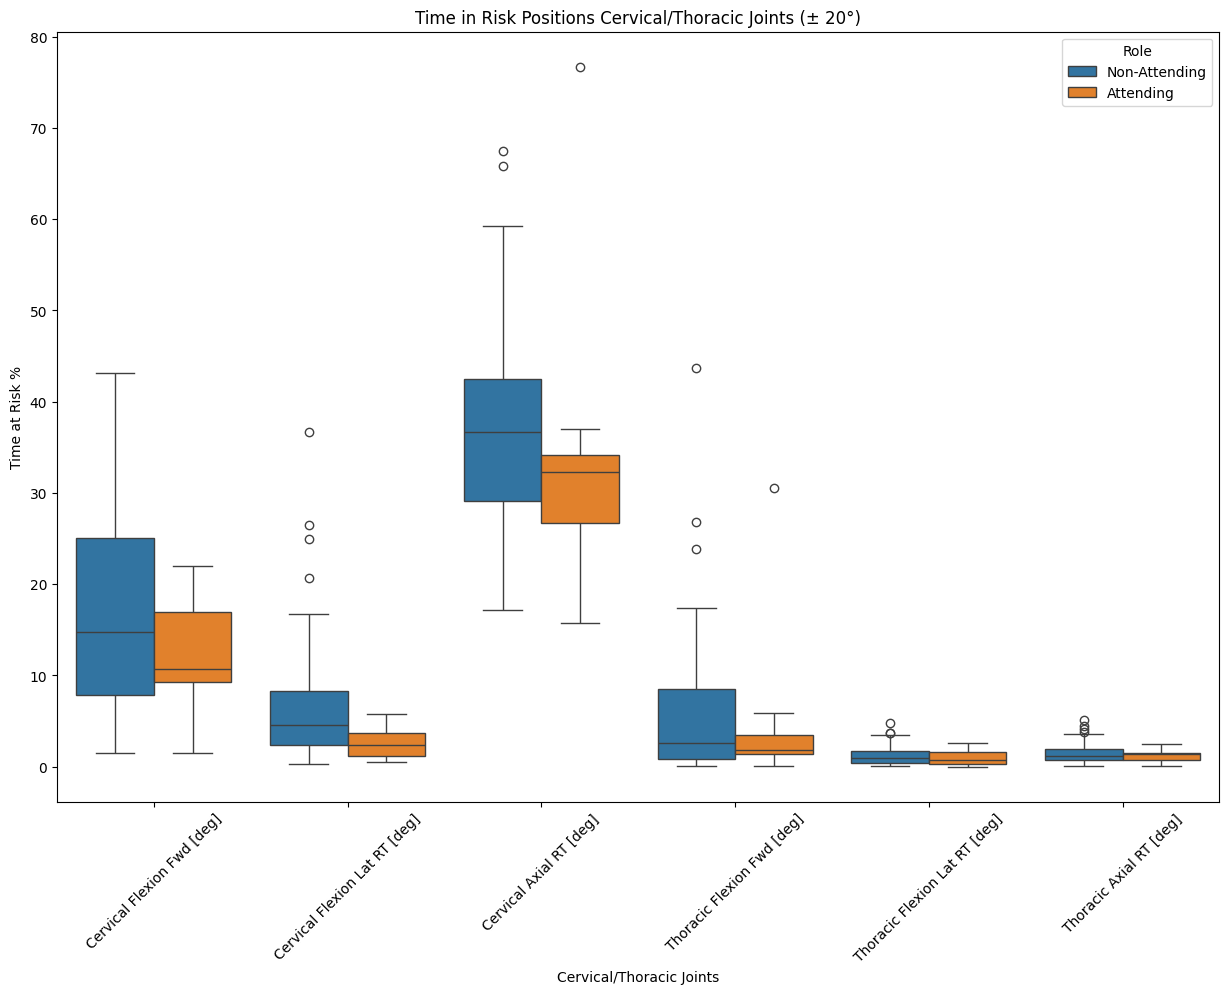

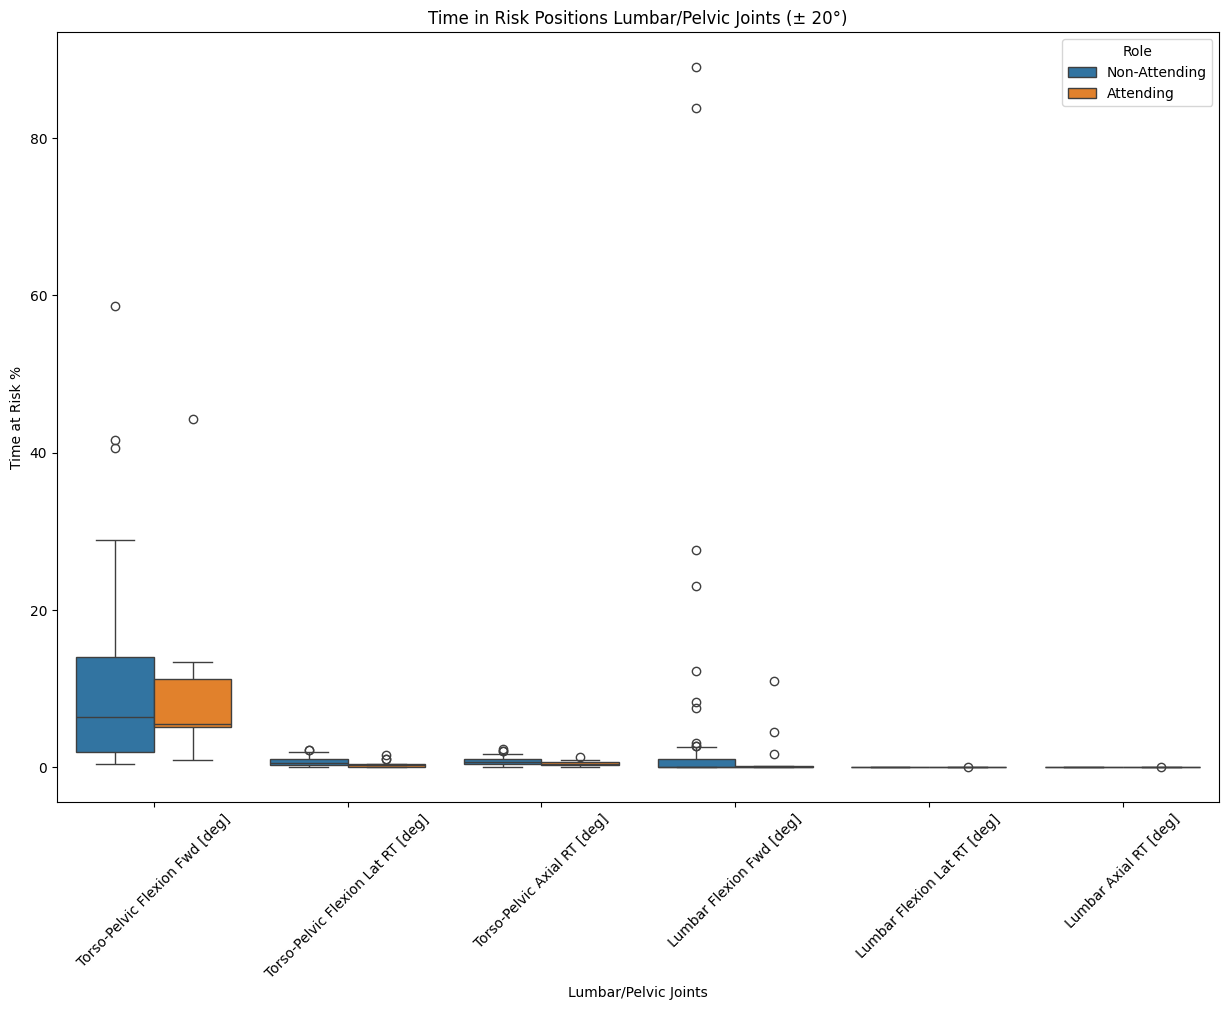

In [53]:
# Sum_duration by Role in cath lab
sum_duration['Role'] = sum_duration['Role in cath lab'].apply(lambda x: 'Attending' if x == 'Attending' else 'Non-Attending')

# Melt the dataframe for Cervical/Thoracic muscle groups
melted_cervical_thoracic = sum_duration.melt(id_vars=['Role'], value_vars=cervical_thoracic_columns, var_name='variable', value_name='value')

# Box plot for Cervical/Thoracic muscle groups
plt.figure(figsize=(15, 10))
sns.boxplot(data=melted_cervical_thoracic, x='variable', y='value', hue='Role', order=cervical_thoracic_columns)
plt.title('Time in Risk Positions Cervical/Thoracic Joints (± 20°)')
plt.xlabel('Cervical/Thoracic Joints')
plt.ylabel('Time at Risk %')
plt.xticks(rotation=45)
plt.show()

# Melt the dataframe for Lumbar/Pelvic muscle groups
melted_lumbar_pelvic = sum_duration.melt(id_vars=['Role'], value_vars=lumbar_pelvic_columns, var_name='variable', value_name='value')

# Box plot for Lumbar/Pelvic muscle groups
plt.figure(figsize=(15, 10))
sns.boxplot(data=melted_lumbar_pelvic, x='variable', y='value', hue='Role', order=lumbar_pelvic_columns)
plt.title('Time in Risk Positions Lumbar/Pelvic Joints (± 20°)')
plt.xlabel('Lumbar/Pelvic Joints')
plt.ylabel('Time at Risk %')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Perform t-test for Cervical/Thoracic muscle groups
for column in cervical_thoracic_columns:
    t_stat, p_value = ttest_ind(sum_nonattending[column], sum_attending[column], nan_policy='omit')
    print(f'T-test for {column}: t-statistic = {t_stat}, p-value = {p_value}')

# Perform t-test for Lumbar/Pelvic muscle groups
for column in lumbar_pelvic_columns:
    t_stat, p_value = ttest_ind(sum_nonattending[column], sum_attending[column], nan_policy='omit')
    print(f'T-test for {column}: t-statistic = {t_stat}, p-value = {p_value}')

T-test for Cervical Flexion Fwd [deg]: t-statistic = 1.5208039780431288, p-value = 0.13365060093199782
T-test for Cervical Flexion Lat RT [deg]: t-statistic = 2.1118250524624798, p-value = 0.03894582152068876
T-test for Cervical Axial RT [deg]: t-statistic = 1.2279397647307004, p-value = 0.2243459455286131
T-test for Thoracic Flexion Fwd [deg]: t-statistic = 0.6631065896810142, p-value = 0.5098448372929454
T-test for Thoracic Flexion Lat RT [deg]: t-statistic = 0.9363132347139514, p-value = 0.35292878604998856
T-test for Thoracic Axial RT [deg]: t-statistic = 0.7787154611747643, p-value = 0.43925944883433854
T-test for Torso-Pelvic Flexion Fwd [deg]: t-statistic = 0.1876217685114866, p-value = 0.8518169277933967
T-test for Torso-Pelvic Flexion Lat RT [deg]: t-statistic = 1.4846075273282446, p-value = 0.14297122949535482
T-test for Torso-Pelvic Axial RT [deg]: t-statistic = 1.7624300342113757, p-value = 0.08317609764709316
T-test for Lumbar Flexion Fwd [deg]: t-statistic = 0.84262820830

### Stratify by Lead vs. Rampart:

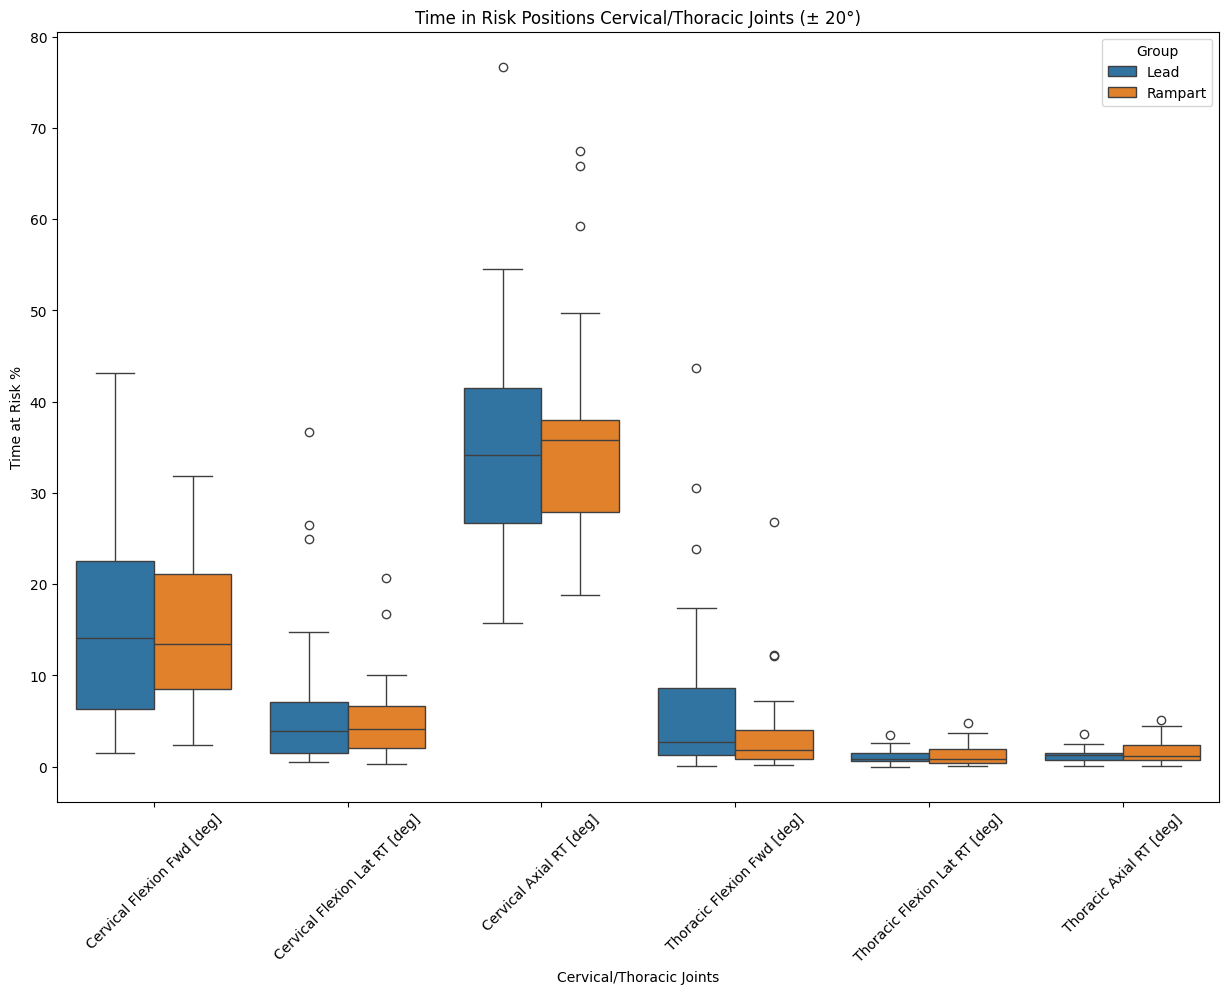

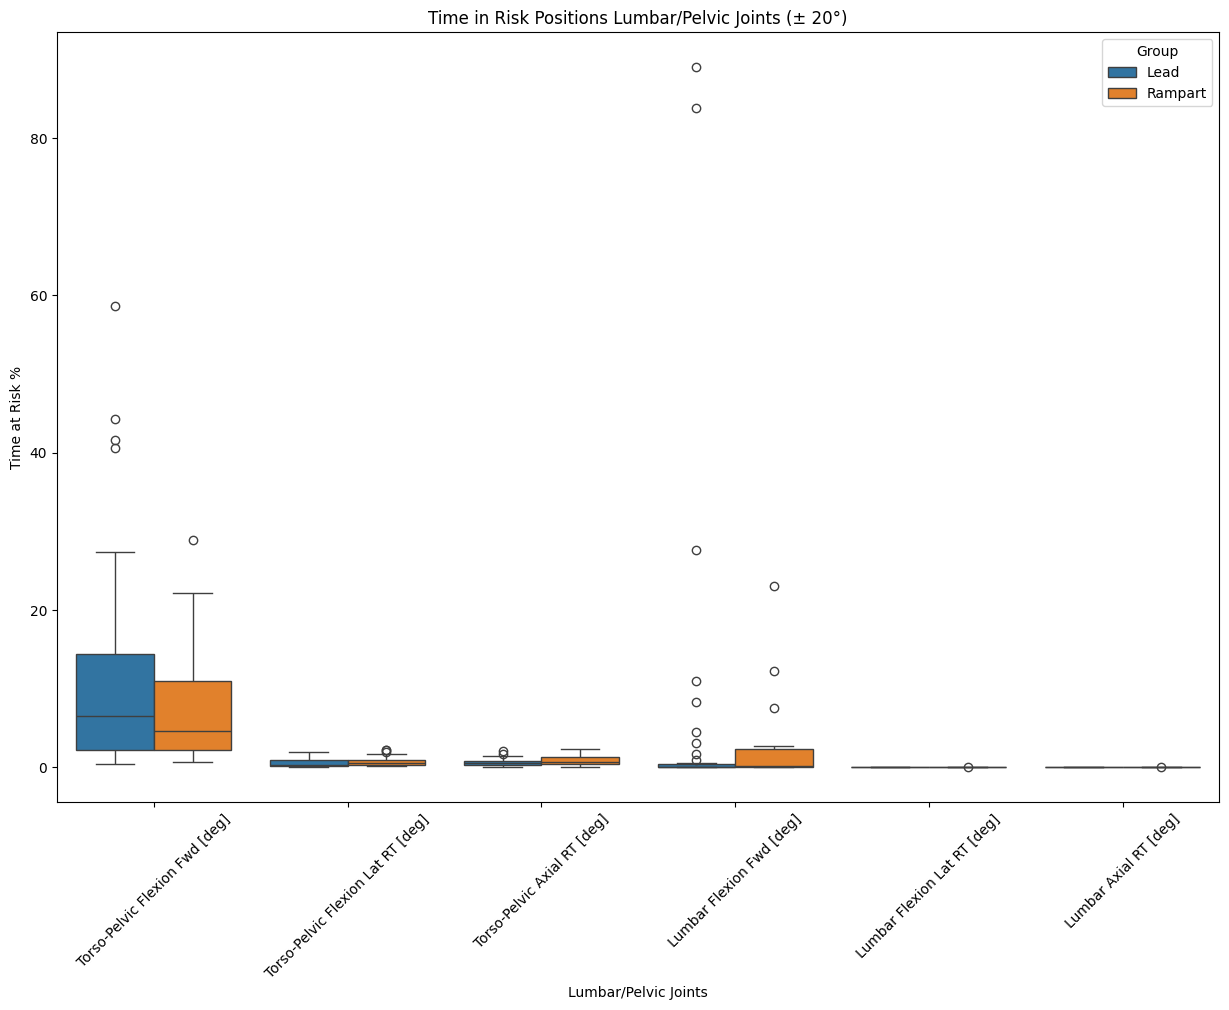

In [54]:
# Add a new column to indicate whether the subject is lead or rampart
sum_duration['Group'] = sum_duration['Participant ID'].apply(lambda x: 'Lead' if x in subject_ids_lead else 'Rampart')

# Melt the dataframe for Cervical/Thoracic muscle groups
melted_cervical_thoracic = sum_duration.melt(id_vars=['Group'], value_vars=cervical_thoracic_columns, var_name='variable', value_name='value')

# Box plot for Cervical/Thoracic muscle groups
plt.figure(figsize=(15, 10))
sns.boxplot(data=melted_cervical_thoracic, x='variable', y='value', hue='Group', 
            order=cervical_thoracic_columns)
plt.title('Time in Risk Positions Cervical/Thoracic Joints (± 20°)')
plt.xticks(rotation=45)
plt.ylabel('Time at Risk %')
plt.xlabel('Cervical/Thoracic Joints')
plt.show()

# Melt the dataframe for Lumbar/Pelvic muscle groups
melted_lumbar_pelvic = sum_duration.melt(id_vars=['Group'], value_vars=lumbar_pelvic_columns, var_name='variable', value_name='value')

# Box plot for Lumbar/Pelvic muscle groups
plt.figure(figsize=(15, 10))
sns.boxplot(data=melted_lumbar_pelvic, x='variable', y='value', hue='Group', 
            order=lumbar_pelvic_columns)
plt.title('Time in Risk Positions Lumbar/Pelvic Joints (± 20°)')
plt.xlabel('Lumbar/Pelvic Joints')
plt.ylabel('Time at Risk %')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Perform t-test for Cervical/Thoracic muscle groups
for column in cervical_thoracic_columns:
    t_stat, p_value = ttest_ind(sum_duration[sum_duration['Group'] == 'Lead'][column], 
                                sum_duration[sum_duration['Group'] == 'Rampart'][column], 
                                nan_policy='omit')
    print(f'T-test for {column}: t-statistic = {t_stat}, p-value = {p_value}')

# Perform t-test for Lumbar/Pelvic muscle groups
for column in lumbar_pelvic_columns:
    t_stat, p_value = ttest_ind(sum_duration[sum_duration['Group'] == 'Lead'][column], 
                                sum_duration[sum_duration['Group'] == 'Rampart'][column], 
                                nan_policy='omit')
    print(f'T-test for {column}: t-statistic = {t_stat}, p-value = {p_value}')

T-test for Cervical Flexion Fwd [deg]: t-statistic = 0.16022143237749598, p-value = 0.8732539468933078
T-test for Cervical Flexion Lat RT [deg]: t-statistic = 0.6864765062962097, p-value = 0.4951018535448788
T-test for Cervical Axial RT [deg]: t-statistic = -0.5324537002377983, p-value = 0.5964114546638787
T-test for Thoracic Flexion Fwd [deg]: t-statistic = 1.0570164754402862, p-value = 0.29481292424306593
T-test for Thoracic Flexion Lat RT [deg]: t-statistic = -1.119448101113359, p-value = 0.26748573971802797
T-test for Thoracic Axial RT [deg]: t-statistic = -1.7653345369779558, p-value = 0.08268222173826227
T-test for Torso-Pelvic Flexion Fwd [deg]: t-statistic = 1.0491110568946602, p-value = 0.2984055543252053
T-test for Torso-Pelvic Flexion Lat RT [deg]: t-statistic = -1.5468356852398184, p-value = 0.12725045935641774
T-test for Torso-Pelvic Axial RT [deg]: t-statistic = -2.0181155941835294, p-value = 0.04813341834983322
T-test for Lumbar Flexion Fwd [deg]: t-statistic = 0.8138524

### Stratify by Case Length:

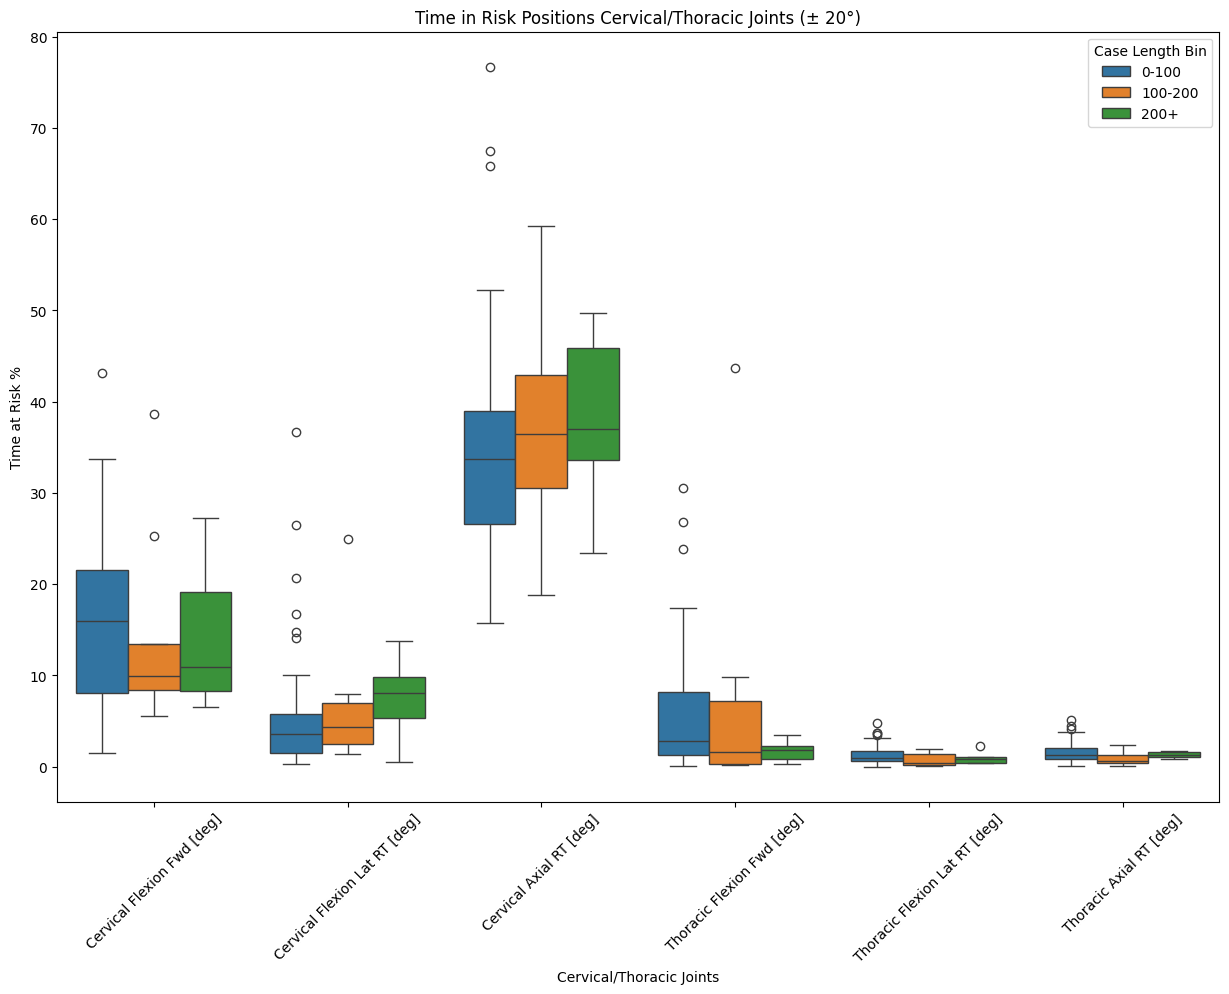

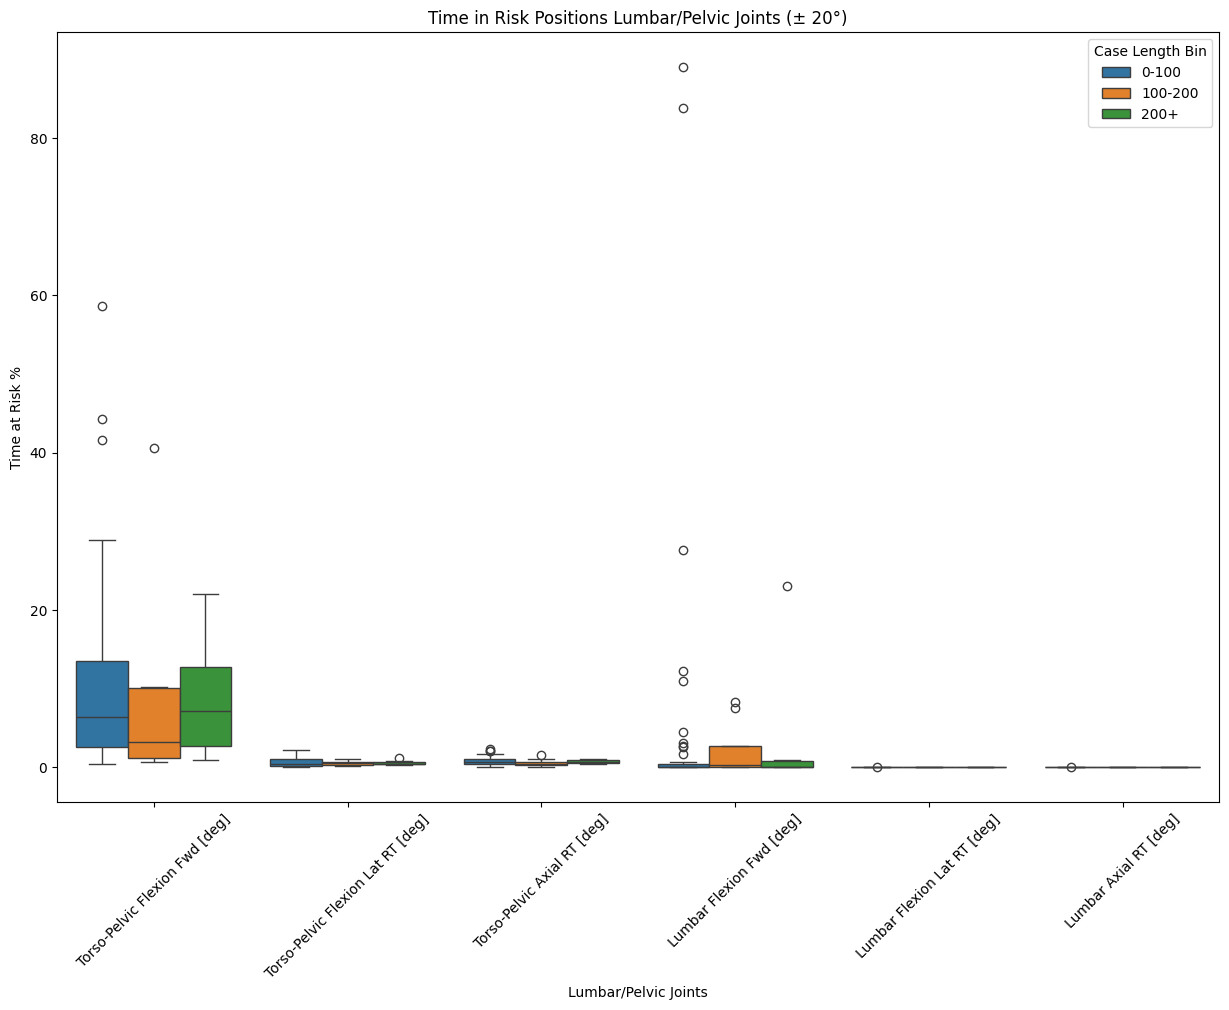

In [55]:
# Define the time bins
bins = [0, 100, 200, 600]
labels = ['0-100', '100-200', '200+']

# Create a new column for the binned case lengths
sum_duration['Case Length Bin'] = pd.cut(sum_duration['Total case length in minutes (first lidocaine injection - sheath removal)'], bins=bins, labels=labels)

# Melt the dataframe for Cervical/Thoracic muscle groups
melted_cervical_thoracic = sum_duration.melt(id_vars=['Case Length Bin'], value_vars=cervical_thoracic_columns, var_name='variable', value_name='value')

# Box plot for Cervical/Thoracic muscle groups
plt.figure(figsize=(15, 10))
sns.boxplot(data=melted_cervical_thoracic, x='variable', y='value', hue='Case Length Bin', 
            order=cervical_thoracic_columns)
plt.title('Time in Risk Positions Cervical/Thoracic Joints (± 20°)')
plt.xticks(rotation=45)
plt.xlabel('Cervical/Thoracic Joints')
plt.ylabel('Time at Risk %')
plt.show()

# Melt the dataframe for Lumbar/Pelvic muscle groups
melted_lumbar_pelvic = sum_duration.melt(id_vars=['Case Length Bin'], value_vars=lumbar_pelvic_columns, var_name='variable', value_name='value')

# Box plot for Lumbar/Pelvic muscle groups
plt.figure(figsize=(15, 10))
sns.boxplot(data=melted_lumbar_pelvic, x='variable', y='value', hue='Case Length Bin', 
            order=lumbar_pelvic_columns)
plt.title('Time in Risk Positions Lumbar/Pelvic Joints (± 20°)')
plt.xticks(rotation=45)
plt.xlabel('Lumbar/Pelvic Joints')
plt.ylabel('Time at Risk %')
plt.show()

In [ ]:
# Perform t-test for Cervical/Thoracic muscle groups by case length
for column in cervical_thoracic_columns:
    for label in labels:
        group1 = sum_duration[sum_duration['Case Length Bin'] == label][column]
        group2 = sum_nonattending[sum_duration['Case Length Bin'] == label][column]
        t_stat, p_value = ttest_ind(group1, group2, nan_policy='omit')
        if p_value < 0.05:
            print(f'T-test for {column} in case length {label}: t-statistic = {t_stat}, p-value = {p_value}')

# Perform t-test for Lumbar/Pelvic muscle groups by case length
for column in lumbar_pelvic_columns:
    for label in labels:
        group1 = sum_duration[sum_duration['Case Length Bin'] == label][column]
        group2 = sum_nonattending[sum_duration['Case Length Bin'] == label][column]
        t_stat, p_value = ttest_ind(group1, group2, nan_policy='omit')
        if p_value < 0.05:
            print(f'T-test for {column} in case length {label}: t-statistic = {t_stat}, p-value = {p_value}')

C:\Users\jrzem\AppData\Local\Temp\ipykernel_7648\3925341544.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2 = sum_nonattending[sum_duration['Case Length Bin'] == label][column]
C:\Users\jrzem\AppData\Local\Temp\ipykernel_7648\3925341544.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2 = sum_nonattending[sum_duration['Case Length Bin'] == label][column]
C:\Users\jrzem\AppData\Local\Temp\ipykernel_7648\3925341544.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2 = sum_nonattending[sum_duration['Case Length Bin'] == label][column]
C:\Users\jrzem\AppData\Local\Temp\ipykernel_7648\3925341544.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2 = sum_nonattending[sum_duration['Case Length Bin'] == label][column]
C:\Users\jrzem\AppData\Local\Temp\ipykernel_7648\3925341544.py:5: UserWarning: Boolean Series key will be reindexed to m

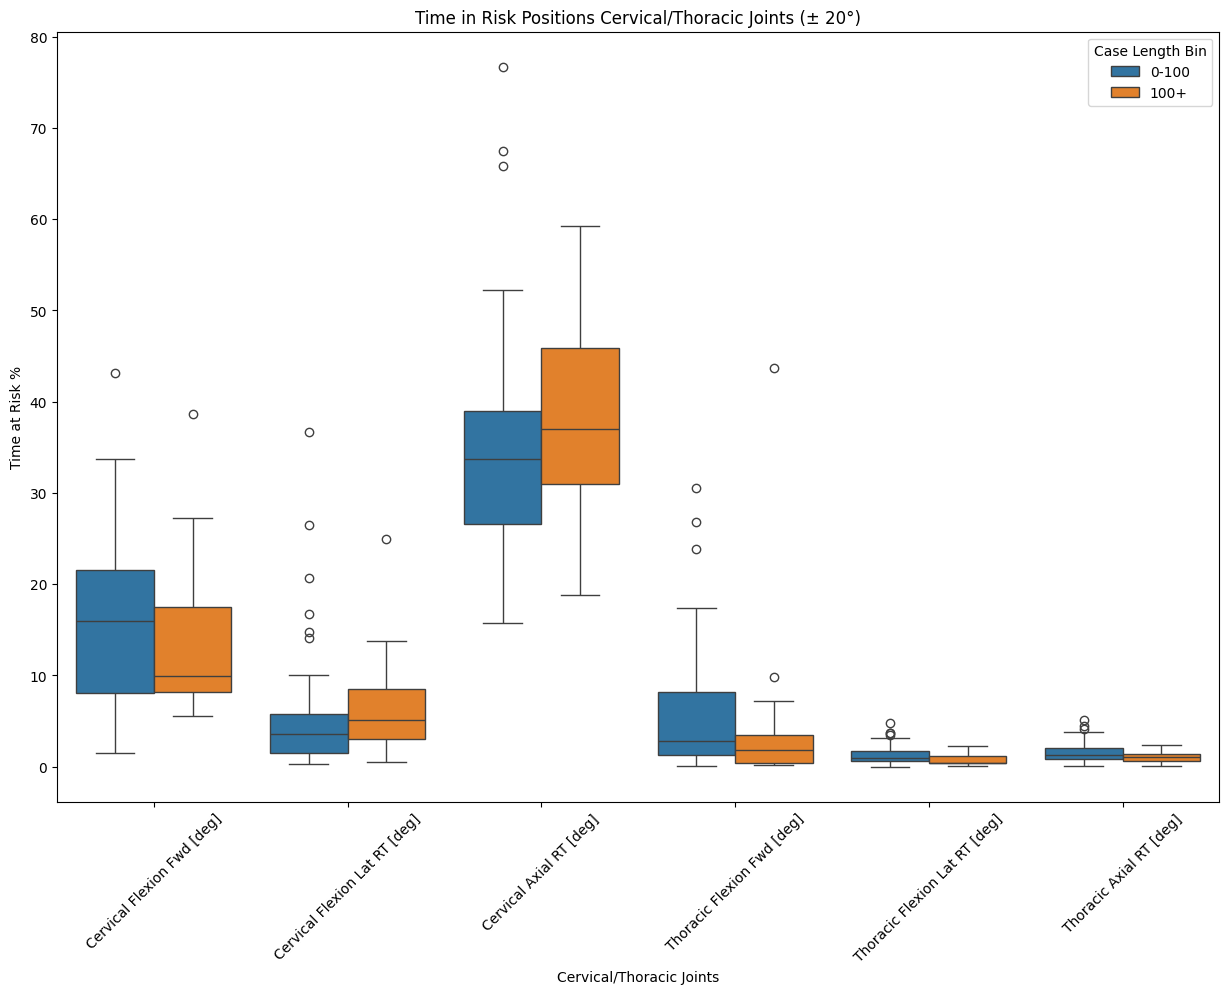

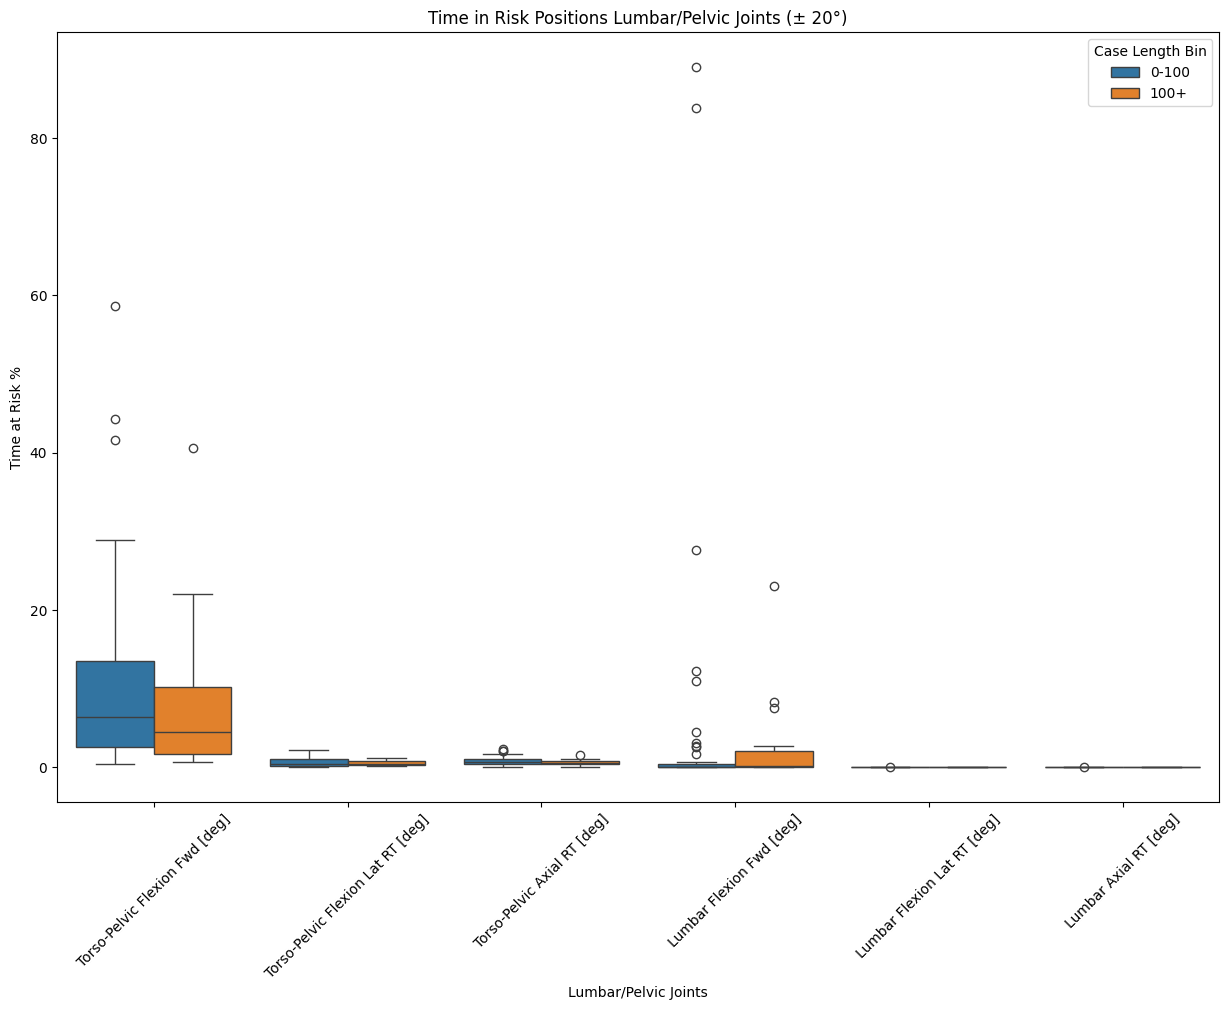

In [56]:
# Define the time bins
bins = [0, 100, 600]
labels = ['0-100', '100+']

# Create a new column for the binned case lengths
sum_duration['Case Length Bin'] = pd.cut(sum_duration['Total case length in minutes (first lidocaine injection - sheath removal)'], bins=bins, labels=labels)

# Melt the dataframe for Cervical/Thoracic muscle groups
melted_cervical_thoracic = sum_duration.melt(id_vars=['Case Length Bin'], value_vars=cervical_thoracic_columns, var_name='variable', value_name='value')

# Box plot for Cervical/Thoracic muscle groups
plt.figure(figsize=(15, 10))
sns.boxplot(data=melted_cervical_thoracic, x='variable', y='value', hue='Case Length Bin', 
            order=cervical_thoracic_columns)
plt.title('Time in Risk Positions Cervical/Thoracic Joints (± 20°)')
plt.xticks(rotation=45)
plt.xlabel('Cervical/Thoracic Joints')
plt.ylabel('Time at Risk %')
plt.show()

# Melt the dataframe for Lumbar/Pelvic muscle groups
melted_lumbar_pelvic = sum_duration.melt(id_vars=['Case Length Bin'], value_vars=lumbar_pelvic_columns, var_name='variable', value_name='value')

# Box plot for Lumbar/Pelvic muscle groups
plt.figure(figsize=(15, 10))
sns.boxplot(data=melted_lumbar_pelvic, x='variable', y='value', hue='Case Length Bin', 
            order=lumbar_pelvic_columns)
plt.title('Time in Risk Positions Lumbar/Pelvic Joints (± 20°)')
plt.xticks(rotation=45)
plt.xlabel('Lumbar/Pelvic Joints')
plt.ylabel('Time at Risk %')
plt.show()

In [ ]:
# Perform t-test for Cervical/Thoracic muscle groups by case length
for column in cervical_thoracic_columns:
    for label in labels:
        group1 = sum_duration[sum_duration['Case Length Bin'] == label][column]
        group2 = sum_nonattending[sum_duration['Case Length Bin'] == label][column]
        t_stat, p_value = ttest_ind(group1, group2, nan_policy='omit')
        if p_value < 0.05:
            print(f'T-test for {column} in case length {label}: t-statistic = {t_stat}, p-value = {p_value}')

# Perform t-test for Lumbar/Pelvic muscle groups by case length
for column in lumbar_pelvic_columns:
    for label in labels:
        group1 = sum_duration[sum_duration['Case Length Bin'] == label][column]
        group2 = sum_nonattending[sum_duration['Case Length Bin'] == label][column]
        t_stat, p_value = ttest_ind(group1, group2, nan_policy='omit')
        if p_value < 0.05:
            print(f'T-test for {column} in case length {label}: t-statistic = {t_stat}, p-value = {p_value}')

C:\Users\jrzem\AppData\Local\Temp\ipykernel_7648\3925341544.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2 = sum_nonattending[sum_duration['Case Length Bin'] == label][column]
C:\Users\jrzem\AppData\Local\Temp\ipykernel_7648\3925341544.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2 = sum_nonattending[sum_duration['Case Length Bin'] == label][column]
C:\Users\jrzem\AppData\Local\Temp\ipykernel_7648\3925341544.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2 = sum_nonattending[sum_duration['Case Length Bin'] == label][column]
C:\Users\jrzem\AppData\Local\Temp\ipykernel_7648\3925341544.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2 = sum_nonattending[sum_duration['Case Length Bin'] == label][column]
C:\Users\jrzem\AppData\Local\Temp\ipykernel_7648\3925341544.py:5: UserWarning: Boolean Series key will be reindexed to m

# Concluding Results:

Overall, we didn't see many results here for statistical significance. We did, however, see that the values are generally different enough visually through the box plots, but it isn't enough to warrent tremendous differences between these different stratifications for the varying muscle groups. 